In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [207]:
df = pd.read_csv('attacks.csv', encoding='cp1252')
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
Case Number               8702 non-null object
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       5737 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href formula              6301 non-null object
href                      6302 non-null obje

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [208]:
#rename columns to get rid of spaces
df_modified = df.rename(columns = lambda x: re.sub('\s+$','',x))

In [209]:
#Delete reduntant columns
df_modified.drop(df_modified.columns[[-9,-8,-7,-6,-5,-4,-3,-2,-1,0]], axis = 1, inplace = True) 
df_modified.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species'],
      dtype='object')

In [210]:
#Delete empty rows
df_modified.drop(df_modified.index[6302:25723], inplace = True)

In [299]:
df_modified = pd.read_csv('Shark_updated.csv')

In [296]:
#Count values of columns and identify important columns
for column in df_modified:
    print(df_modified[column].value_counts())


1957              11
1942               9
1956               8
1950               7
1958               7
                  ..
15-Dec-1917        1
Summer of 1926     1
02-Jan-2003        1
02-Dec-1975        1
04-Feb-2005        1
Name: Date, Length: 5433, dtype: int64
2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1753.0      1
77.0        1
1785.0      1
1580.0      1
1543.0      1
Name: Year, Length: 249, dtype: int64
Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64
USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
                    ... 
DIEGO GARCIA           1
ARGENTINA              1
TASMAN SEA             1
COOK ISLANDS           1
CURACAO                1
Name: Country, Length: 212, dtype: int64
Florida                      

Useful columns: Type, Country, Area, Activity, Sex, Age, Fatal


In [302]:
#Clean the data of the columns we find useful
#Type: Wont need modification
#Country: Wont need modification
#Area: Wont need modification
#Activity: Wont need modification


In [ ]:
#Sex : Change values to have female and male only
df_modified["Sex"].replace({"N": None, "M ": "M", ".": None, "lli": None}, inplace=True)


In [ ]:
#Age: Fix so that only values are integers or NaN
#TODO
df_copy = df_modified.copy()
df_copy 
#df_copy["Age"] = df_copy["Age"].apply(lambda x: None if isinstance(x, str) else x)


In [ ]:
#Fatal: Fix so we only have Y or N
df_modified["Fatal (Y/N)"].replace({"UNKNOWN": None, " N" : "N", "y": "Y", "M": None, "2017": None, "N " : "N"}, inplace=True)

In [345]:
#print(df_copy["Age"].values.tolist())
lst = df_copy["Age"].values.tolist()
#new = [(lambda x: x if re.match(r"^'\d+'$") else None) for x in lst]
#new = []
new_age = []


for elem in lst:
    if(type(elem)) == str:
        try:
            #print(int(elem))
            new_age.append(int(elem))
        except:
            #print("found impostor", elem)
            new_age.append(None)
    else:
        new_age.append(elem)

print(new_age)




#df_copy['digits'] = df_copy['Age'].apply(lambda x: x if re.match(r'') else None)
#print(df_copy["digits"].values.tolist())

[57, 11, 48, nan, nan, nan, 18, 52, 15, 12, 32, 10, 10, 21, 34, nan, nan, nan, 30, nan, nan, 60, nan, 32, 33, 29, 54, 34, 41, 37, nan, 56, nan, 12, 19, 25, 10, 69, 18, 38, 55, 34, 35, nan, 46, 45, 14, 18, None, nan, 28, 20, nan, 54, 35, 24, 25, 26, 49, nan, 25, 14, 24, 25, 22, 7, 31, nan, nan, 17, 60, 15, nan, nan, 54, 40, 31, nan, nan, 33, nan, nan, 13, 28, 25, nan, nan, 18, nan, 35, nan, nan, 42, nan, nan, 17, 37, 3, 11, nan, 69, nan, 13, 20, 34, nan, 15, 10, 12, nan, nan, 37, nan, nan, 40, 8, 40, 50, nan, nan, nan, 46, 32, 13, nan, nan, 16, nan, 14, 34, 82, nan, nan, 48, nan, 19, 30, nan, 32, 20, nan, 73, 41, 29, 33, 18, nan, 14, 33, 28, None, nan, 40, nan, nan, 17, 28, 17, nan, 68, 35, 10, 21, 16, 51, 39, 17, 58, 30, nan, 25, 58, nan, nan, 26, 26, 22, nan, nan, nan, 37, 21, None, 55, 57, nan, 48, 35, 47, 20, 16, nan, 55, 61, None, 19, 20, 65, 73, 58, 41, 42, 36, 36, nan, 66, nan, 25, 29, 21, 32, 17, 16, 36, 43, 43, nan, nan, nan, None, 51, 50, 12, nan, 9, 22, nan, 25, 37, 20, 49, 1

In [353]:
# Find the name of the column by index
n = df_modified.columns[9]
print(n)

# Drop that column
df_modified.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
df_modified[n] = new_age
print(df_modified.head(5))

Time
          Date    Year        Type    Country             Area  \
0  25-Jun-2018  2018.0     Boating        USA       California   
1  18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2  09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity             Name Sex  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe   F   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely    F   
2                    Habush, Oahu      Surfing      John Denges   M   
3              Arrawarra Headland      Surfing             male   M   
4                        La Ticla  Free diving   Gustavo Ramos    M   

           Species  Injury  Fatal (Y/N)  Time  
0      White shark    57.0         57.0  57.0  
1              NaN    11.0         11.0  11.0  
2              NaN    48.0 

In [317]:
df_modified.to_csv(r'Shark_clean.csv', index = False)

In [365]:
#################
#Domingo tarde
#################
df_clean = pd.read_csv('Shark_clean.csv')
df_clean.head(50)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
5,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris …,M,NaN,"No injury, board bitten",N,NaN,NaN
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
9,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN


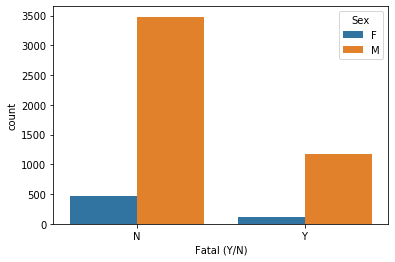

In [366]:
sns.countplot(x = df_clean["Fatal (Y/N)"], hue = df_clean["Sex"])

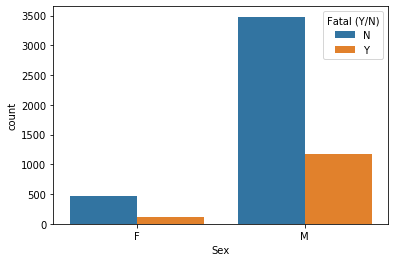

In [367]:
sns.countplot(x = df_clean["Sex"], hue = df_clean["Fatal (Y/N)"])

In [368]:
lst = df_copy["Age"].values.tolist()
#new = [(lambda x: x if re.match(r"^'\d+'$") else None) for x in lst]
#new = []
new_age = []


for elem in lst:
    if(type(elem)) == str:
        try:
            #print(int(elem))
            new_age.append(int(elem))
        except:
            #print("found impostor", elem)
            new_age.append(None)
    else:
        new_age.append(elem)

df_clean['New_age'] = pd.Series(new_age) 


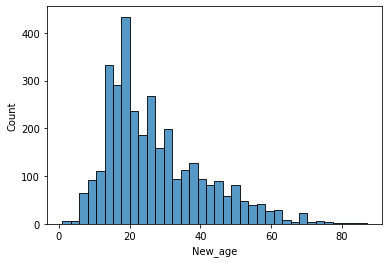

In [373]:
sns.histplot(x = df_clean.New_age)

In [376]:
del df_clean['Age']


In [379]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 14 columns):
Date           6302 non-null object
Year           6300 non-null float64
Type           6298 non-null object
Country        6252 non-null object
Area           5847 non-null object
Location       5762 non-null object
Activity       5758 non-null object
Name           6092 non-null object
Sex            5733 non-null object
Injury         6274 non-null object
Fatal (Y/N)    5690 non-null object
Time           2948 non-null object
Species        3464 non-null object
New_age        3369 non-null float64
dtypes: float64(2), object(12)
memory usage: 2.7+ MB


In [383]:
df_clean.rename(columns={'New_age':'Age', "Fatal (Y/N)":"Fatal"}, inplace=True)

In [386]:
#Final drops
df_clean.drop(df_clean.columns[[0,5,7,9,11,12]], axis = 1, inplace = True) 


In [387]:
df_clean.columns

Index(['Year', 'Type', 'Country', 'Area', 'Activity', 'Sex', 'Fatal', 'Age'], dtype='object')

In [389]:
df_clean.describe()

,Year,Age
count,6300.000000,3369.000000
mean,1927.272381,27.368359
std,281.116308,13.907779
min,0.000000,1.000000
25%,1942.000000,17.000000
50%,1977.000000,24.000000
75%,2005.000000,35.000000
max,2018.000000,87.000000


In [394]:
df_clean["Type"].replace({"Boatomg": "Boating", "Boat": "Boating", "Questionable": None, "Invalid":None}, inplace=True)

In [395]:
df_clean.to_csv(r'shark_dom_noche.csv', index = False)

In [391]:
!ls

Data_cleaning.ipynb Shark_clean.csv     attacks.csv
README.md           Shark_updated.csv   shark_dom_noche.csv
